<a href="https://colab.research.google.com/github/DmsAnhr/PCVK_Genap_2023/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Dimas Putra Anhar**
### **TI - 3C / 05**
### **2141720258**

## Praktikum


In [3]:
from google.colab import drive
drive.mount( '/content/drive')

Mounted at /content/drive


In [33]:
import cv2 as cv
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import glob

Gamma Correction pada citra
---------------------------
Masukkan nilai Gamma: 3


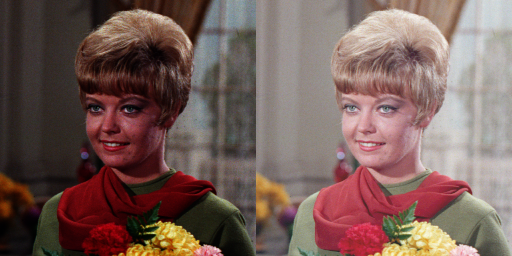

In [26]:
## NO 1

print('Gamma Correction pada citra')
print('---------------------------')
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, bukan angka')

image_ori = cv.imread('/content/drive/MyDrive/PCVK/female.png')
image_gamma = np.zeros(image_ori.shape, image_ori.dtype)

for baris in range(image_ori.shape[0]):
    for kolom in range(image_ori.shape[1]):
        for channel in range(image_ori.shape[2]):
            image_gamma[baris, kolom, channel] = np.clip((image_ori[baris, kolom, channel] / 255.0) ** (1 / gamma) * 255.0, 0, 255)

final_frame = cv.hconcat((image_ori, image_gamma))
cv2_imshow(final_frame)


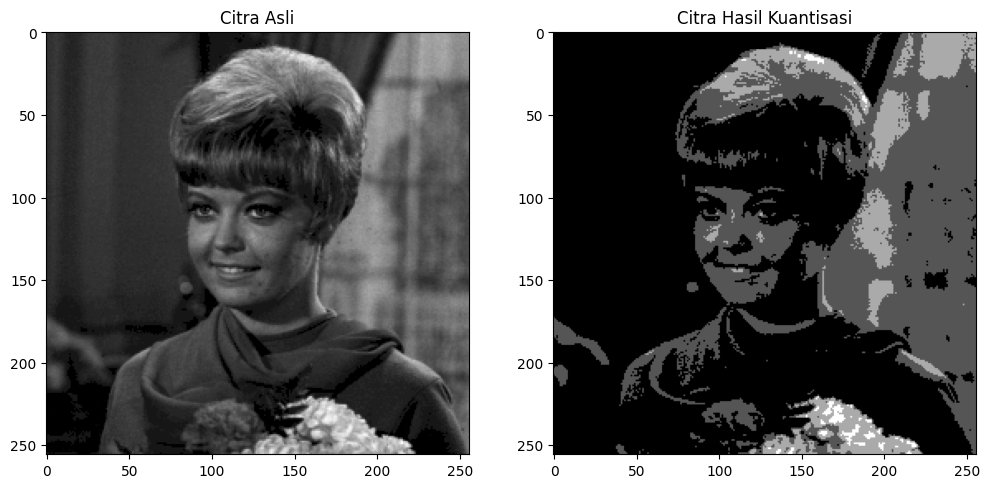

In [32]:
## NO 2

bit_depth = 2
levels = pow(2, bit_depth)

ori_gray = cv.imread('/content/drive/MyDrive/PCVK/female.png', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(ori_gray.shape, ori_gray.dtype)

for i in range(levels):
    # Hitung batas bawah dan batas atas untuk setiap level
    lower_bound = int((i / levels) * 256)
    upper_bound = int(((i + 1) / levels) * 256) - 1

    # Tentukan area yang akan dikuantisasi
    mask = cv.inRange(ori_gray, lower_bound, upper_bound)

    # Set semua piksel dalam area tersebut menjadi nilai rata-rata
    depth_image = depth_image + (mask / 255) * (upper_bound - (lower_bound) / 2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(ori_gray, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Citra Hasil Kuantisasi')
plt.imshow(depth_image, cmap='gray')

plt.show()

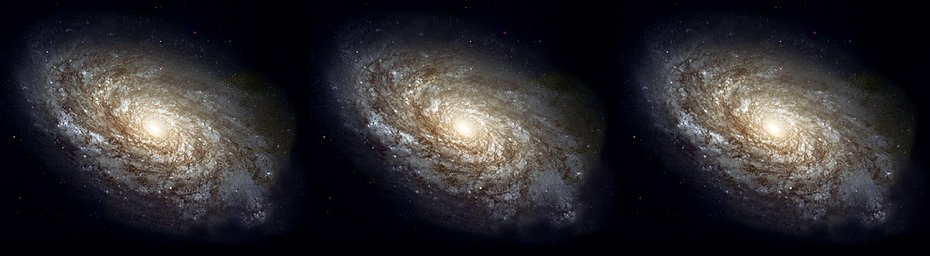

In [46]:
## NO 3

original_image = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
noisy_images = []
for img_path in glob.glob('/content/drive/MyDrive/PCVK/galaxy.jpg'):
    noisy_image = cv.imread(img_path)
    noisy_images.append(noisy_image)

def average_denoising(noisy_images):
    num_images = len(noisy_images)
    denoised_image = np.zeros_like(noisy_images[0], dtype=np.float32)

    for noisy_image in noisy_images:
        denoised_image += noisy_image / num_images

    return denoised_image.astype(np.uint8)

denoised_result = average_denoising(noisy_images)

final_frame = cv.hconcat((original_image, noisy_images[0], denoised_result))
cv2_imshow(final_frame)

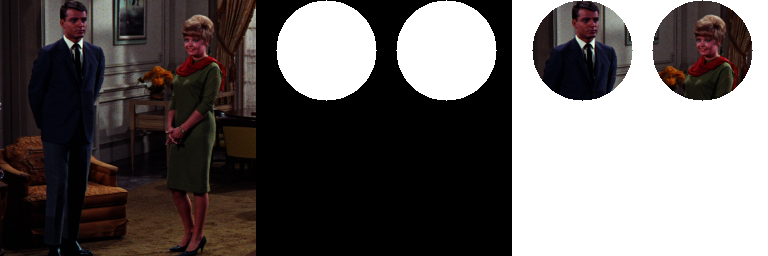

In [66]:
## NO 4

img = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = img & mask & mask2
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)


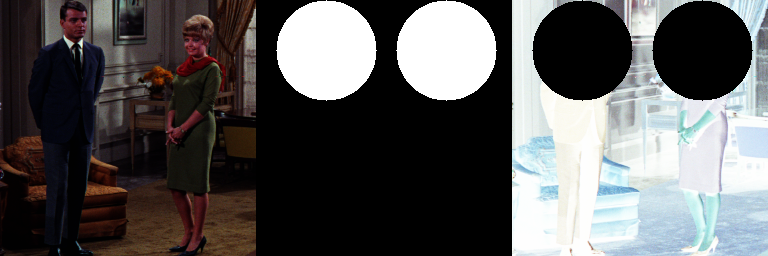

In [68]:
## NO 5 NOT

img = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result_not = ~img & ~mask & ~mask2

final_frame = cv.hconcat((img, mask, result_not))
cv2_imshow(final_frame)

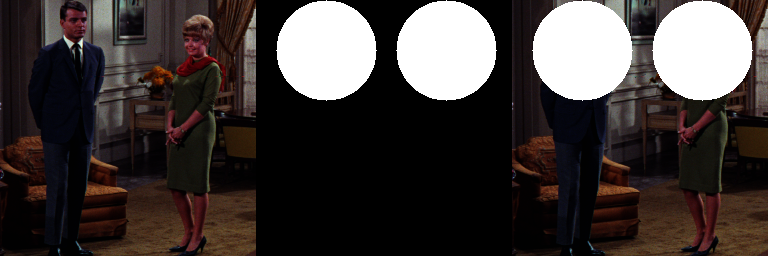

In [72]:
## NO 5 OR

img = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result_or = img | mask | mask2

final_frame = cv.hconcat((img, mask, result_or))
cv2_imshow(final_frame)

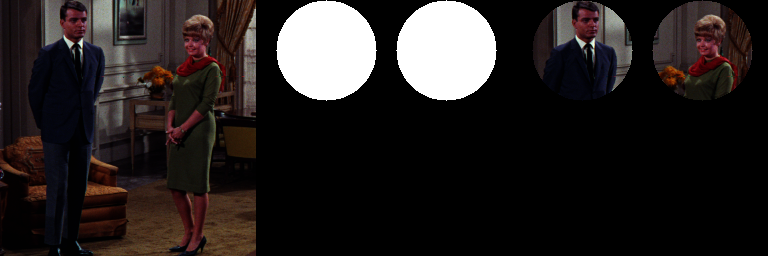

In [74]:
## NO 5 AND

img = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result_and = img & mask & mask2

final_frame = cv.hconcat((img, mask, result_and))
cv2_imshow(final_frame)

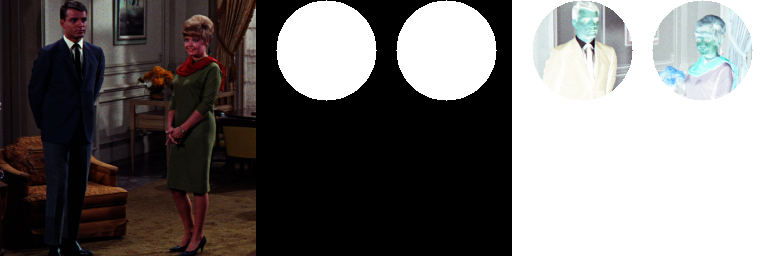

In [75]:
## NO 5 NAND

img = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result_nand = ~(img & mask & mask2)

final_frame = cv.hconcat((img, mask, result_nand))
cv2_imshow(final_frame)

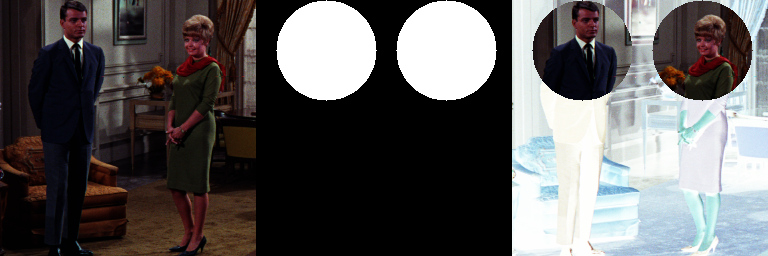

In [77]:
## NO 5 XOR

img = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result_and = ~img ^ mask & mask2

final_frame = cv.hconcat((img, mask, result_and))
cv2_imshow(final_frame)

### TUGAS KELOMPOK

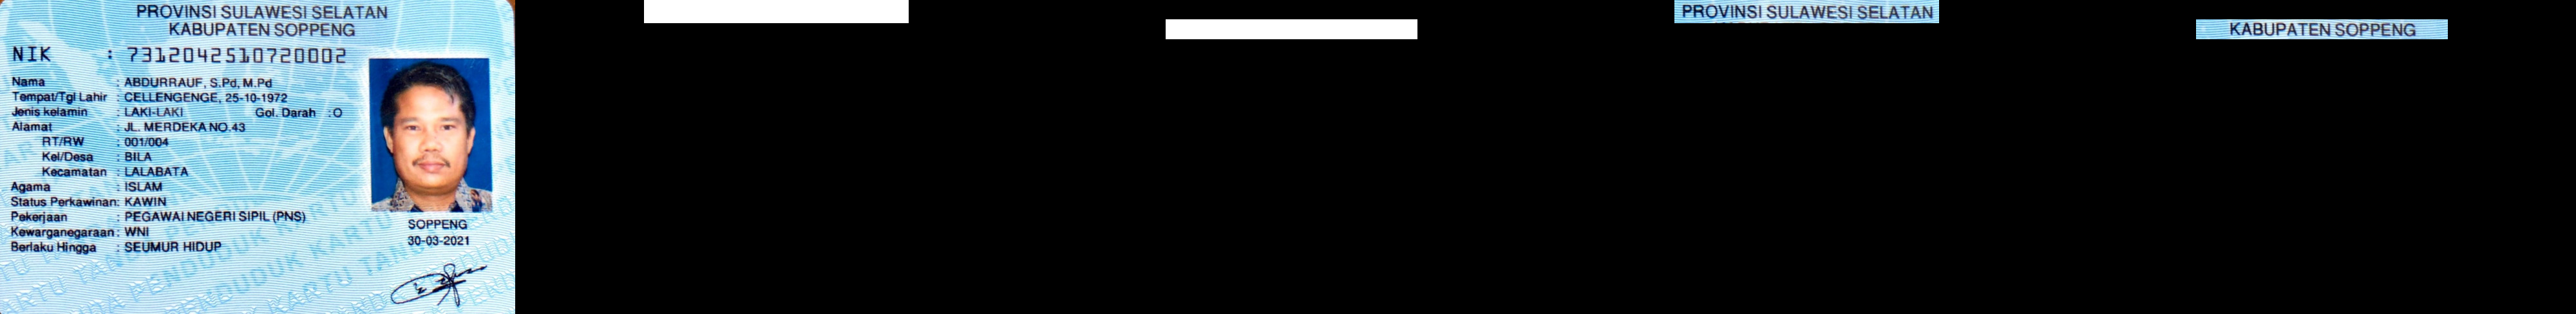

True

In [107]:
# Membaca citra asli
img_asli = cv.imread('/content/drive/MyDrive/PCVK/Salinan KTP.jpeg')

kotak = cv.rectangle(mask,(200,0), (610,35), (255,255,255), -1)
mask = np.zeros(img_asli.shape, dtype=np.uint8)
mask = cv.rectangle(mask,(200,0), (610,35), (255,255,255), -1)

mask2 = np.zeros(img_asli.shape, dtype=np.uint8)
mask2 = cv.rectangle(mask2,(210,30), (600,60), (255,255,255), -1)

result_kotak = img_asli & mask
result_kotak2 = img_asli & mask2

final_frame = cv.hconcat((img_asli, mask,mask2, result_kotak, result_kotak2))
cv2_imshow(final_frame)

cv.imwrite('/content/drive/MyDrive/PCVK/KTP_provinsi.jpeg', result_kotak)
cv.imwrite('/content/drive/MyDrive/PCVK/KTP_kabupaten.jpeg', result_kotak2)